## Linear Regression and Train/Test Split challenges

`Topic:      Challenge Set 5
Subject:    Linear Regression and Train/Test Split challenges
Date:       01/28/17
Name:       Sungwan Kim`

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import patsy
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.cross_validation import train_test_split

/Users/sungwankim/anaconda2/envs/python3/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools
/Users/sungwankim/anaconda2/envs/python3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
df = pd.read_csv("~/ds/metis/nyc18_ds14/challenges/challenges_data/2013_movies.csv")

In [3]:
df.head()

,Title,Budget,DomesticTotalGross,Director,Rating,Runtime,ReleaseDate
0,The Hunger Games: Catching Fire,130000000.0,424668047,Francis Lawrence,PG-13,146,2013-11-22 00:00:00
1,Iron Man 3,200000000.0,409013994,Shane Black,PG-13,129,2013-05-03 00:00:00
2,Frozen,150000000.0,400738009,Chris BuckJennifer Lee,PG,108,2013-11-22 00:00:00
3,Despicable Me 2,76000000.0,368061265,Pierre CoffinChris Renaud,PG,98,2013-07-03 00:00:00
4,Man of Steel,225000000.0,291045518,Zack Snyder,PG-13,143,2013-06-14 00:00:00


### Challenge 1
Build a linear model that uses only a constant term (a column of ones) to predict a continuous outcome (like domestic total gross). How can you interpret the results of this model? What does it predict? Make a plot of predictions against actual outcome. Make a histogram of residuals. How are the residuals distributed?

In [4]:
# create a column of ones
df["ones"] = 1

In [5]:
df.head()

,Title,Budget,DomesticTotalGross,Director,Rating,Runtime,ReleaseDate,ones
0,The Hunger Games: Catching Fire,130000000.0,424668047,Francis Lawrence,PG-13,146,2013-11-22 00:00:00,1
1,Iron Man 3,200000000.0,409013994,Shane Black,PG-13,129,2013-05-03 00:00:00,1
2,Frozen,150000000.0,400738009,Chris BuckJennifer Lee,PG,108,2013-11-22 00:00:00,1
3,Despicable Me 2,76000000.0,368061265,Pierre CoffinChris Renaud,PG,98,2013-07-03 00:00:00,1
4,Man of Steel,225000000.0,291045518,Zack Snyder,PG-13,143,2013-06-14 00:00:00,1


In [6]:
y, X = patsy.dmatrices('DomesticTotalGross ~ ones', data = df, return_type = "dataframe")
model = sm.OLS(y, X)
fit = model.fit()
fit.summary()

/Users/sungwankim/anaconda2/envs/python3/lib/python3.6/site-packages/statsmodels/regression/linear_model.py:1396: RuntimeWarning: divide by zero encountered in double_scalars
  return self.ess/self.df_model


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     DomesticTotalGross   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                       inf
Date:                Tue, 30 Jan 2018   Prob (F-statistic):                nan
Time:                        16:45:14   Log-Likelihood:                -1970.0
No. Observations:                 100   AIC:                             3942.
Df Residuals:                      99   BIC:                             3945.
Df Model:                           0                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    5.03e+07   4.37e+06     11.510      0.000    4.16e+07     5.9e+07
ones         5.03e+07   4.37e+06     11.510      0.000    4.16e+07     5.9e+07
==============================================================================
Omnibus:                       51.114   Durbin-Watson:                   0.013
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              125.961
Skew:                           1.985   Prob(JB):                     4.45e-28
Kurtosis:                       6.804   Cond. No.                     7.24e+16
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 3.81e-32. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

The coefficient of the *ones* variable is the mean of the DomesticTotalGross.

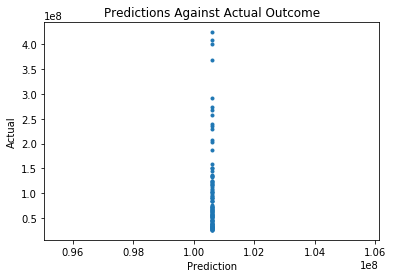

In [7]:
plt.plot(fit.predict(X), y, marker = '.', ls = 'None')
plt.title('Predictions Against Actual Outcome')
plt.xlabel('Prediction')
plt.ylabel('Actual');

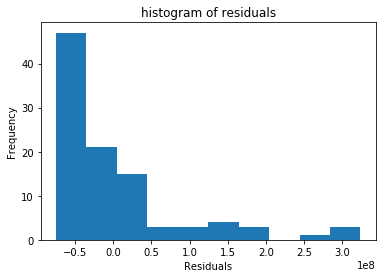

In [8]:
fit.resid.hist(grid = False)
plt.title('histogram of residuals')
plt.xlabel('Residuals')
plt.ylabel('Frequency');

Residuals are not normally distributed.

### Challenge 2
Repeat the process of challenge one, but also add one continuous (numeric) predictor variable. Also add plots of model prediction against your feature variable and residuals against feature variable. How can you interpret what's happening in the model?

In [9]:
df.head()

,Title,Budget,DomesticTotalGross,Director,Rating,Runtime,ReleaseDate,ones
0,The Hunger Games: Catching Fire,130000000.0,424668047,Francis Lawrence,PG-13,146,2013-11-22 00:00:00,1
1,Iron Man 3,200000000.0,409013994,Shane Black,PG-13,129,2013-05-03 00:00:00,1
2,Frozen,150000000.0,400738009,Chris BuckJennifer Lee,PG,108,2013-11-22 00:00:00,1
3,Despicable Me 2,76000000.0,368061265,Pierre CoffinChris Renaud,PG,98,2013-07-03 00:00:00,1
4,Man of Steel,225000000.0,291045518,Zack Snyder,PG-13,143,2013-06-14 00:00:00,1


In [10]:
y, X = patsy.dmatrices('DomesticTotalGross ~ ones + Budget', data = df, return_type = "dataframe")
model = sm.OLS(y, X)
fit = model.fit()
fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     DomesticTotalGross   R-squared:                       0.286
Model:                            OLS   Adj. R-squared:                  0.278
Method:                 Least Squares   F-statistic:                     34.82
Date:                Tue, 30 Jan 2018   Prob (F-statistic):           6.80e-08
Time:                        16:45:14   Log-Likelihood:                -1738.1
No. Observations:                  89   AIC:                             3480.
Df Residuals:                      87   BIC:                             3485.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    2.22e+07   6.33e+06      3.504      0.001    9.61e+06    3.48e+07
ones         2.22e+07   6.33e+06      3.504      0.001    9.61e+06    3.48e+07
Budget         0.7846      0.133      5.901      0.000       0.520       1.049
==============================================================================
Omnibus:                       39.749   Durbin-Watson:                   0.674
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               99.441
Skew:                           1.587   Prob(JB):                     2.55e-22
Kurtosis:                       7.091   Cond. No.                     2.68e+17
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.13e-17. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

For one unit increase in Budget, the predicted increase in DomesticTotalGross is 0.7846.

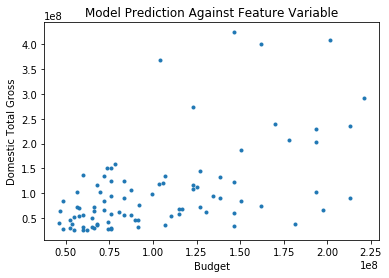

In [11]:
plt.plot(fit.predict(X), y, marker = '.', ls = 'None')
plt.title('Model Prediction Against Feature Variable')
plt.xlabel('Budget')
plt.ylabel('Domestic Total Gross');

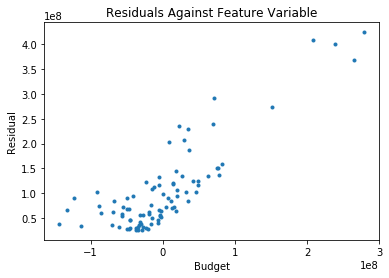

In [12]:
plt.plot(fit.resid, y, marker = '.', ls = 'None')
plt.title('Residuals Against Feature Variable')
plt.xlabel('Budget')
plt.ylabel('Residual');

### Challenge 3
Repeat the process of challenge 1, but add a categorical feature (like genre). You'll have to convert a column of text into a number of numerical columns ("dummy variables"). How can you interpret what's happening in the model?

In [13]:
df = df.join(pd.get_dummies(df.Rating))
df.drop(['Rating', 'PG-13'], axis = 1, inplace = True)
df.head()

,Title,Budget,DomesticTotalGross,Director,Runtime,ReleaseDate,ones,G,PG,R
0,The Hunger Games: Catching Fire,130000000.0,424668047,Francis Lawrence,146,2013-11-22 00:00:00,1,0,0,0
1,Iron Man 3,200000000.0,409013994,Shane Black,129,2013-05-03 00:00:00,1,0,0,0
2,Frozen,150000000.0,400738009,Chris BuckJennifer Lee,108,2013-11-22 00:00:00,1,0,1,0
3,Despicable Me 2,76000000.0,368061265,Pierre CoffinChris Renaud,98,2013-07-03 00:00:00,1,0,1,0
4,Man of Steel,225000000.0,291045518,Zack Snyder,143,2013-06-14 00:00:00,1,0,0,0


In [14]:
y, X = patsy.dmatrices('DomesticTotalGross ~ ones + G + PG + R', data = df, return_type = "dataframe")
model = sm.OLS(y, X)
fit = model.fit()
fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     DomesticTotalGross   R-squared:                       0.109
Model:                            OLS   Adj. R-squared:                  0.081
Method:                 Least Squares   F-statistic:                     3.924
Date:                Tue, 30 Jan 2018   Prob (F-statistic):             0.0109
Time:                        16:45:15   Log-Likelihood:                -1964.2
No. Observations:                 100   AIC:                             3936.
Df Residuals:                      96   BIC:                             3947.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   5.572e+07   6.11e+06      9.122      0.000    4.36e+07    6.79e+07
ones        5.572e+07   6.11e+06      9.122      0.000    4.36e+07    6.79e+07
G            1.57e+08   8.47e+07      1.855      0.067    -1.1e+07    3.25e+08
PG          1.969e+07   2.48e+07      0.792      0.430   -2.96e+07     6.9e+07
R          -4.156e+07   1.84e+07     -2.257      0.026   -7.81e+07   -5.01e+06
==============================================================================
Omnibus:                       46.897   Durbin-Watson:                   0.240
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              109.261
Skew:                           1.826   Prob(JB):                     1.88e-24
Kurtosis:                       6.589   Cond. No.                     2.76e+16
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 2.85e-31. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

According to the model, G-rated movie is predicted to earn 1.57e08 more than PG-13 movie; PG-rated movie is predicted to earn 1.969e07 more than PG-13 movie; and R-rated movie is expected to make 4.156e07 less than PG-13 movie. The PG-13 movie is predicted to make 5.572e07 Domestic Total Gross.

### Challenge 4
Enhance your model further by adding more features and/or transforming existing features. Think about how you build the model matrix and how to interpret what the model is doing.

In [15]:
df.head()

,Title,Budget,DomesticTotalGross,Director,Runtime,ReleaseDate,ones,G,PG,R
0,The Hunger Games: Catching Fire,130000000.0,424668047,Francis Lawrence,146,2013-11-22 00:00:00,1,0,0,0
1,Iron Man 3,200000000.0,409013994,Shane Black,129,2013-05-03 00:00:00,1,0,0,0
2,Frozen,150000000.0,400738009,Chris BuckJennifer Lee,108,2013-11-22 00:00:00,1,0,1,0
3,Despicable Me 2,76000000.0,368061265,Pierre CoffinChris Renaud,98,2013-07-03 00:00:00,1,0,1,0
4,Man of Steel,225000000.0,291045518,Zack Snyder,143,2013-06-14 00:00:00,1,0,0,0


In [16]:
y, X = patsy.dmatrices('DomesticTotalGross ~ ones + G + PG + R + Runtime', data = df, return_type = "dataframe")
model = sm.OLS(y, X)
fit = model.fit()
fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     DomesticTotalGross   R-squared:                       0.215
Model:                            OLS   Adj. R-squared:                  0.182
Method:                 Least Squares   F-statistic:                     6.497
Date:                Tue, 30 Jan 2018   Prob (F-statistic):           0.000115
Time:                        16:45:15   Log-Likelihood:                -1957.9
No. Observations:                 100   AIC:                             3926.
Df Residuals:                      95   BIC:                             3939.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -4.164e+07   2.78e+07     -1.495      0.138   -9.69e+07    1.36e+07
ones       -4.164e+07   2.78e+07     -1.495      0.138   -9.69e+07    1.36e+07
G           1.745e+08      8e+07      2.180      0.032    1.56e+07    3.33e+08
PG          4.881e+07   2.48e+07      1.967      0.052   -4.61e+05    9.81e+07
R          -3.032e+07   1.77e+07     -1.717      0.089   -6.54e+07    4.73e+06
Runtime     1.657e+06   4.64e+05      3.574      0.001    7.37e+05    2.58e+06
==============================================================================
Omnibus:                       43.608   Durbin-Watson:                   0.448
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               95.295
Skew:                           1.721   Prob(JB):                     2.03e-21
Kurtosis:                       6.319   Cond. No.                     5.97e+18
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 3.63e-32. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

### Challenge 5
Fitting and checking predictions on the exact same data set can be misleading. Divide your data into two sets: a training and a test set (roughly 75% training, 25% test is a fine split). Fit a model on the training set, check the predictions (by plotting versus actual values) in the test set.

In [17]:
df.dropna(inplace = True)
y = df.DomesticTotalGross
X = df.drop(['DomesticTotalGross', 'Title', 'Director', 'ReleaseDate', 'G'], 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

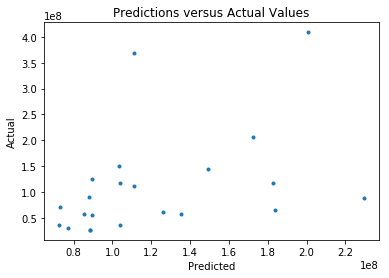

In [18]:
lr = LinearRegression()
lr.fit(X_train, y_train)
plt.plot(lr.predict(X_test), y_test, marker = '.', ls = 'None')
plt.title('Predictions versus Actual Values')
plt.xlabel('Predicted')
plt.ylabel('Actual');